In [1]:
# import all relevant packages
import pandas as pd
from pandas import DataFrame
from pandas import read_csv

import numpy as np
from numpy.polynomial import Polynomial

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime

import scipy
from scipy import fftpack
from scipy.signal import savgol_filter
from scipy.stats.stats import pearsonr

In [2]:
# import the data set 

# create a custom date parse function for the data
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
custom_date_parser2 = lambda x: datetime.strptime(x, '%Y-%m-%d')
# create an easy variable for the .csv file path

filename1 = r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\MOD19A1\25pixel\statistics_sur_refl_b01.csv"
filename2 = r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\MOD19A1\25pixel\statistics_sur_refl_b02.csv"
filename3 = r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\MOD19A1\25pixel\statistics_sur_refl_b03.csv"
filename4 = r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\MOD19A1\25pixel\statistics_sur_refl_b04.csv"


# load in the .csv using pandas.read_csv and set the index as the column date 
dfB1 = read_csv(filename1, header=0, parse_dates=[1], date_parser=custom_date_parser)
dfB2 = read_csv(filename2, header=0, parse_dates=[1], date_parser=custom_date_parser)
dfB3 = read_csv(filename3, header=0, parse_dates=[1], date_parser=custom_date_parser)
dfB4 = read_csv(filename4, header=0, parse_dates=[1], date_parser=custom_date_parser)
# inquire the dataframe
#df.info()



In [3]:
# set general plot paramters
plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size' : 24})

In [4]:
dfB1 = dfB1[['date','B1','B1per_cent_pixels_pass_qa']]
dfB2 = dfB2[['date','B2','B2per_cent_pixels_pass_qa']]
dfB3 = dfB3[['date','B3','B3per_cent_pixels_pass_qa']]
dfB4 = dfB4[['date','B4','B4per_cent_pixels_pass_qa']]

dfB1.set_index('date')
dfB2.set_index('date')
dfB3.set_index('date')
dfB4.set_index('date')

,B4,B4per_cent_pixels_pass_qa
date,,
2000-02-18,0.0583,16
2000-02-26,0.0411,24
2000-03-05,0.0535,92
2000-03-13,0.0441,100
2000-03-21,0.0369,100
...,...,...
2012-12-02,0.0456,100
2012-12-10,0.0546,100
2012-12-18,0.0410,36


In [5]:
df1 = dfB1.join(dfB2, dfB1.index, how = 'left', lsuffix = 'd')

In [6]:
df2 = df1.join(dfB3, df1.index, how = 'left', lsuffix = '1')

In [7]:
df = df2.join(dfB4, df2.index, how ='left', lsuffix = '2')

In [8]:
df = df[['dated','B1','B1per_cent_pixels_pass_qa','B2','B2per_cent_pixels_pass_qa',
         'B3','B3per_cent_pixels_pass_qa','B4','B4per_cent_pixels_pass_qa']]
df = df.rename(columns={'dated':'date'})
df

,date,B1,B1per_cent_pixels_pass_qa,B2,B2per_cent_pixels_pass_qa,B3,B3per_cent_pixels_pass_qa,B4,B4per_cent_pixels_pass_qa
0,2000-02-18,0.0362,16,0.1276,16,0.0379,16,0.0583,16
1,2000-02-26,0.0368,24,0.1952,24,0.0181,24,0.0411,24
2,2000-03-05,0.0376,92,0.1312,92,0.0391,92,0.0535,92
3,2000-03-13,0.0354,100,0.1582,100,0.0182,100,0.0441,100
4,2000-03-21,0.0305,100,0.1579,100,0.0140,100,0.0369,100
...,...,...,...,...,...,...,...,...,...
587,2012-12-02,0.0394,100,0.1570,100,0.0286,100,0.0456,100
588,2012-12-10,0.0432,100,0.2000,100,0.0267,100,0.0546,100
589,2012-12-18,0.0289,36,0.1302,36,0.0293,36,0.0410,36
590,2012-12-26,0.0295,68,0.1491,68,0.0274,68,0.0386,68


In [10]:
df = df[df['B1'] != 0]

# remove poor pixels

## clean for pixel pass percentage
df = df[df['per_cent_pixels_pass_qa'] > 50]
df1 = df1[df1['per_cent_pixels_pass_qa'] > 50]

In [11]:
df = df[['date','B1','B2','B3','B4']]
df

,date,B1,B2,B3,B4
0,2000-02-18,0.0362,0.1276,0.0379,0.0583
1,2000-02-26,0.0368,0.1952,0.0181,0.0411
2,2000-03-05,0.0376,0.1312,0.0391,0.0535
3,2000-03-13,0.0354,0.1582,0.0182,0.0441
4,2000-03-21,0.0305,0.1579,0.0140,0.0369
...,...,...,...,...,...
587,2012-12-02,0.0394,0.1570,0.0286,0.0456
588,2012-12-10,0.0432,0.2000,0.0267,0.0546
589,2012-12-18,0.0289,0.1302,0.0293,0.0410
590,2012-12-26,0.0295,0.1491,0.0274,0.0386


In [12]:
# create easy variables for each column 
B1 = df['B1']
B2 = df['B2']
B3 = df['B3']
B4 = df['B4']

#df.info()

# calculate the EVI for each 8day composite
df['EVI'] = (2.5*(df['B2']-df['B1']) / (df['B2'] + (6*df['B1']) - (7.5*df['B3']) + 1))

#calculate the GRVI for each 8day composite
df['GRVI'] = ((df['B4']-df['B1']) / (df['B4']+df['B1']))

# calculate the NDVI for each 8day composite
df['NDVI'] = ((df['B2']-df['B1']) / (df['B2']+df['B1']))


In [13]:
df = df.set_index('date')
df

,B1,B2,B3,B4,EVI,GRVI,NDVI
date,,,,,,,
2000-02-18,0.0362,0.1276,0.0379,0.0583,0.215454,0.233862,0.557998
2000-02-26,0.0368,0.1952,0.0181,0.0411,0.309315,0.055199,0.682759
2000-03-05,0.0376,0.1312,0.0391,0.0535,0.220018,0.174533,0.554502
2000-03-13,0.0354,0.1582,0.0182,0.0441,0.248764,0.109434,0.634298
2000-03-21,0.0305,0.1579,0.0140,0.0369,0.257707,0.094955,0.676221
...,...,...,...,...,...,...,...
2012-12-02,0.0394,0.1570,0.0286,0.0456,0.249385,0.072941,0.598778
2012-12-10,0.0432,0.2000,0.0267,0.0546,0.311371,0.116564,0.644737
2012-12-18,0.0289,0.1302,0.0293,0.0410,0.233658,0.173104,0.636706


In [14]:
evisg = savgol_filter(df['EVI'],25, 2, mode = 'mirror') # Savistky-Golay on a 2nd order polynomial function
ndvisg = savgol_filter(df['NDVI'],15, 2, mode = 'mirror') # Savistky-Golay on a 2nd order polynomial function
grvisg = savgol_filter(df['GRVI'],25, 2, mode = 'mirror') # Savistky-Golay on a 2nd order polynomial function

In [15]:
df['EVI_SG_FILT'] = evisg
df['NDVI_SG_FILT'] = ndvisg
df['GRVI_SG_FILT'] = grvisg

In [16]:
df_year = df.index.year # Extract the year from the DF index
df.insert(0, 'Year', df_year) # Add the year as the first column

In [ ]:
## EVI Threshold ##

In [17]:
df_gs = df[['EVI_SG_FILT','Year']] # select only EVI and Year for 20th percentile calc
df_g_max = df_gs.groupby('Year').max() # Determine the max value in each year
df_g_min = df_gs.groupby('Year').min() # Determine the min value in each year


df_amp_join = df_g_max.join(df_g_min, 'Year', lsuffix ='Year' ) #  join the max and min df 


df_amp_join.rename(columns = {'EVI_SG_FILTYear':'EVI_SG_FILT_MAX','EVI_SG_FILT': 'EVI_SG_FILT_MIN'}, inplace = True) # rename columns 

df_amp_join

df_amp = df_amp_join # rename df 

df_amp['EVI_AMPLITUDE'] = df_amp['EVI_SG_FILT_MAX'] - df_amp['EVI_SG_FILT_MIN'] # calculate the amplitude of the yearly gpp change
df_amp['EVI_20th'] = df_amp['EVI_AMPLITUDE'].mul(.20) # determine the 20th percentile from the amplitude
df_amp['EVI_MINCORRECTED_20th'] = df_amp['EVI_SG_FILT_MIN'] + df_amp['EVI_20th'] # correct the 20th percentile for the min

#df_amp

In [18]:
df = df.join(df_amp, 'Year', how = 'left', lsuffix = 'Year')
df

,Year,B1,B2,B3,B4,EVI,GRVI,NDVI,EVI_SG_FILT,NDVI_SG_FILT,GRVI_SG_FILT,EVI_SG_FILT_MAX,EVI_SG_FILT_MIN,EVI_AMPLITUDE,EVI_20th,EVI_MINCORRECTED_20th
date,,,,,,,,,,,,,,,,
2000-02-18,2000,0.0362,0.1276,0.0379,0.0583,0.215454,0.233862,0.557998,0.248408,0.603385,0.115576,0.321358,0.248408,0.07295,0.014590,0.262998
2000-02-26,2000,0.0368,0.1952,0.0181,0.0411,0.309315,0.055199,0.682759,0.251903,0.627171,0.115871,0.321358,0.248408,0.07295,0.014590,0.262998
2000-03-05,2000,0.0376,0.1312,0.0391,0.0535,0.220018,0.174533,0.554502,0.255717,0.607706,0.121369,0.321358,0.248408,0.07295,0.014590,0.262998
2000-03-13,2000,0.0354,0.1582,0.0182,0.0441,0.248764,0.109434,0.634298,0.260402,0.588744,0.121536,0.321358,0.248408,0.07295,0.014590,0.262998
2000-03-21,2000,0.0305,0.1579,0.0140,0.0369,0.257707,0.094955,0.676221,0.266524,0.590783,0.122015,0.321358,0.248408,0.07295,0.014590,0.262998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-02,2012,0.0394,0.1570,0.0286,0.0456,0.249385,0.072941,0.598778,0.283948,0.651574,0.127110,0.326187,0.274478,0.05171,0.010342,0.284820
2012-12-10,2012,0.0432,0.2000,0.0267,0.0546,0.311371,0.116564,0.644737,0.278048,0.632723,0.125269,0.326187,0.274478,0.05171,0.010342,0.284820
2012-12-18,2012,0.0289,0.1302,0.0293,0.0410,0.233658,0.173104,0.636706,0.274553,0.650211,0.121727,0.326187,0.274478,0.05171,0.010342,0.284820


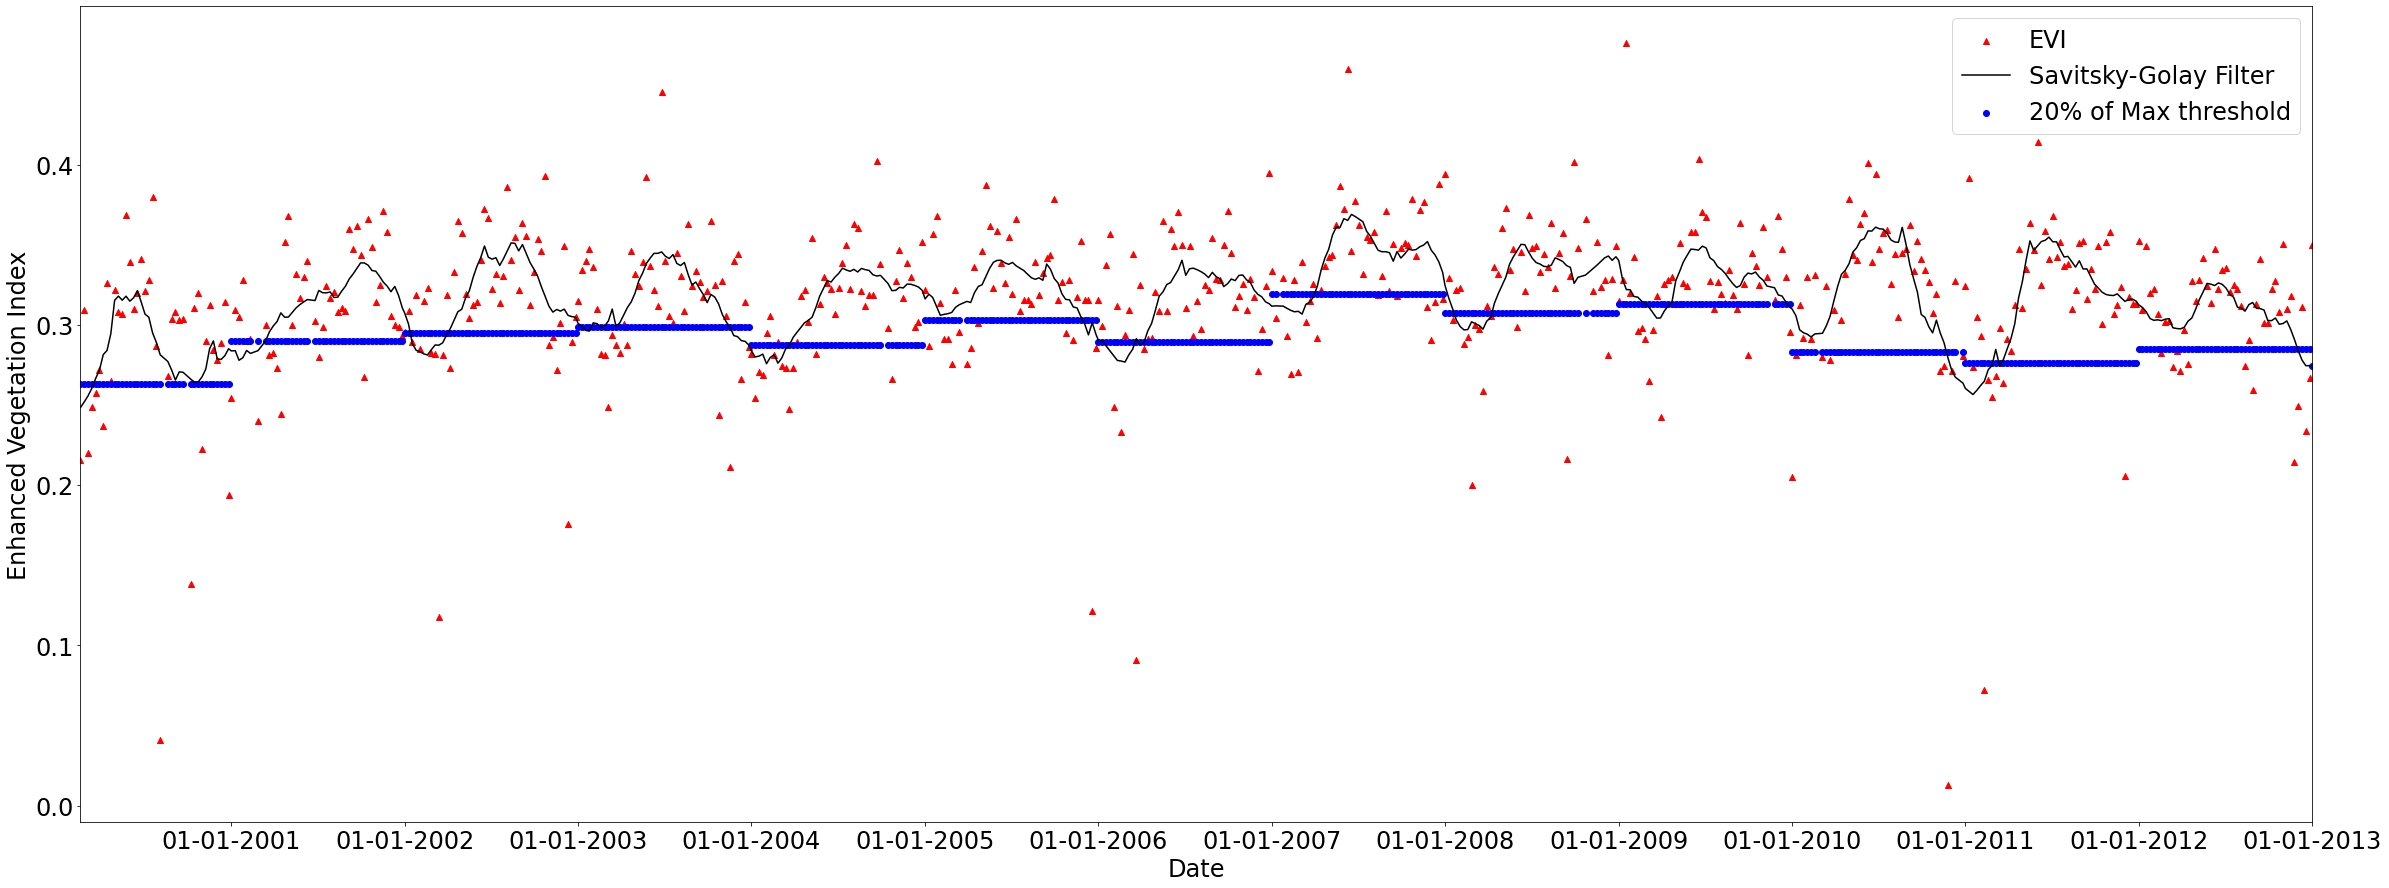

In [19]:
fig, evi = plt.subplots()
evi.scatter(df.index, df['EVI'], color = 'red', label = 'EVI', marker ='^')

# set x-label 
evi.set_xlabel('Date')
evi.tick_params('x', labelsize =24)

# set primary y label
evi.set_ylabel('Enhanced Vegetation Index')

# define the plot for the secondary y

# set x-axis limits as the min and max of the series
evi.set_xlim(date2num([df.index.min(), df.index.max()]))
evi.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
evi.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

# plot the savitsky-golay filter
evi.plot(df.index, evisg, color = 'black', label = 'Savitsky-Golay Filter')
evi.scatter(df.index, df['EVI_MINCORRECTED_20th'], color = 'blue', label ='20% of Max threshold')
plt.legend()
plt.show()

In [ ]:
# check if GPP_SG_FILT is less then Min_Corrected_Annual_20th%

# define a function which checks the value of the filtered SG value against the annual min corrected 20th percentile.
# if the value is less than the 20th% than FALSE, if greater it is TRUE
def check_df(df):
    if (df['EVI_SG_FILT'] < (df['EVI_MINCORRECTED_20th'])):
        return 0
    elif (df['EVI_SG_FILT'] > (df['EVI_MINCORRECTED_20th'])):
        return 1
    else:
        return np.nan


######
    
df['BoolCheck'] = df.apply(check_df, axis=1) # apply the function to the dataframe

######

# create another column which checks if the values in 'BoolCheck' change between rows.
# if they do than True, if they dont than false
df['changes'] = df["BoolCheck"].shift() != df["BoolCheck"] 

eviSC = df.loc[df['changes'] == True] # create a new df that only has values of change 

#######

eviSOS2 = eviSC.loc[eviSC['BoolCheck'] == 1] # filter for all the instances where the change goes from false to true, SOS

eviEOS2 = eviSC.loc[eviSC['BoolCheck'] == 0] # Now filter for all the instances where the change is from true to false, EOS


eviSOS1 = eviSOS2[['EVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns
eviEOS1 = eviEOS2[['EVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns 

eSOS = eviSOS1.drop(['2003-02-02','2006-01-01','2006-04-15','2010-01-01','2011-03-06'])
eEOS = eviEOS1.drop(['2002-01-17','2000-02-18', '2001-01-01','2001-01-01','2003-01-17', '2003-02-18', '2006-01-17',
                      '2006-03-30', '2007-01-01','2008-01-25','2009-02-26','2011-03-14'])

print(eSOS, eEOS)

In [20]:
df_gs = df[['NDVI_SG_FILT','Year']] # select only EVI and Year for 20th percentile calc
df_g_max = df_gs.groupby('Year').max() # Determine the max value in each year
df_g_min = df_gs.groupby('Year').min() # Determine the min value in each year


df_amp_join = df_g_max.join(df_g_min, 'Year', lsuffix ='Year' ) #  join the max and min df 


df_amp_join.rename(columns = {'NDVI_SG_FILTYear':'NDVI_SG_FILT_MAX','NDVI_SG_FILT': 'NDVI_SG_FILT_MIN'}, inplace = True) # rename columns 

df_amp_join

df_amp = df_amp_join # rename df 

df_amp['NDVI_AMPLITUDE'] = df_amp['NDVI_SG_FILT_MAX'] - df_amp['NDVI_SG_FILT_MIN'] # calculate the amplitude of the yearly gpp change
df_amp['NDVI_20th'] = df_amp['NDVI_AMPLITUDE'].mul(.20) # determine the 20th percentile from the amplitude
df_amp['NDVI_MINCORRECTED_20th'] = df_amp['NDVI_SG_FILT_MIN'] + df_amp['NDVI_20th'] # correct the 20th percentile for the min

df_amp

,NDVI_SG_FILT_MAX,NDVI_SG_FILT_MIN,NDVI_AMPLITUDE,NDVI_20th,NDVI_MINCORRECTED_20th
Year,,,,,
2000,0.717182,0.576961,0.140221,0.028044,0.605005
2001,0.750622,0.580431,0.170191,0.034038,0.614469
2002,0.780370,0.556479,0.223891,0.044778,0.601257
2003,0.741421,0.650550,0.090871,0.018174,0.668725
2004,0.767053,0.640152,0.126901,0.025380,0.665532
2005,0.771842,0.678843,0.092999,0.018600,0.697443
2006,0.756107,0.598594,0.157512,0.031502,0.630097
2007,0.760704,0.687178,0.073525,0.014705,0.701883
2008,0.764074,0.616331,0.147743,0.029549,0.645879


In [21]:
df = df.join(df_amp, 'Year', how = 'left', lsuffix = 'Year') 

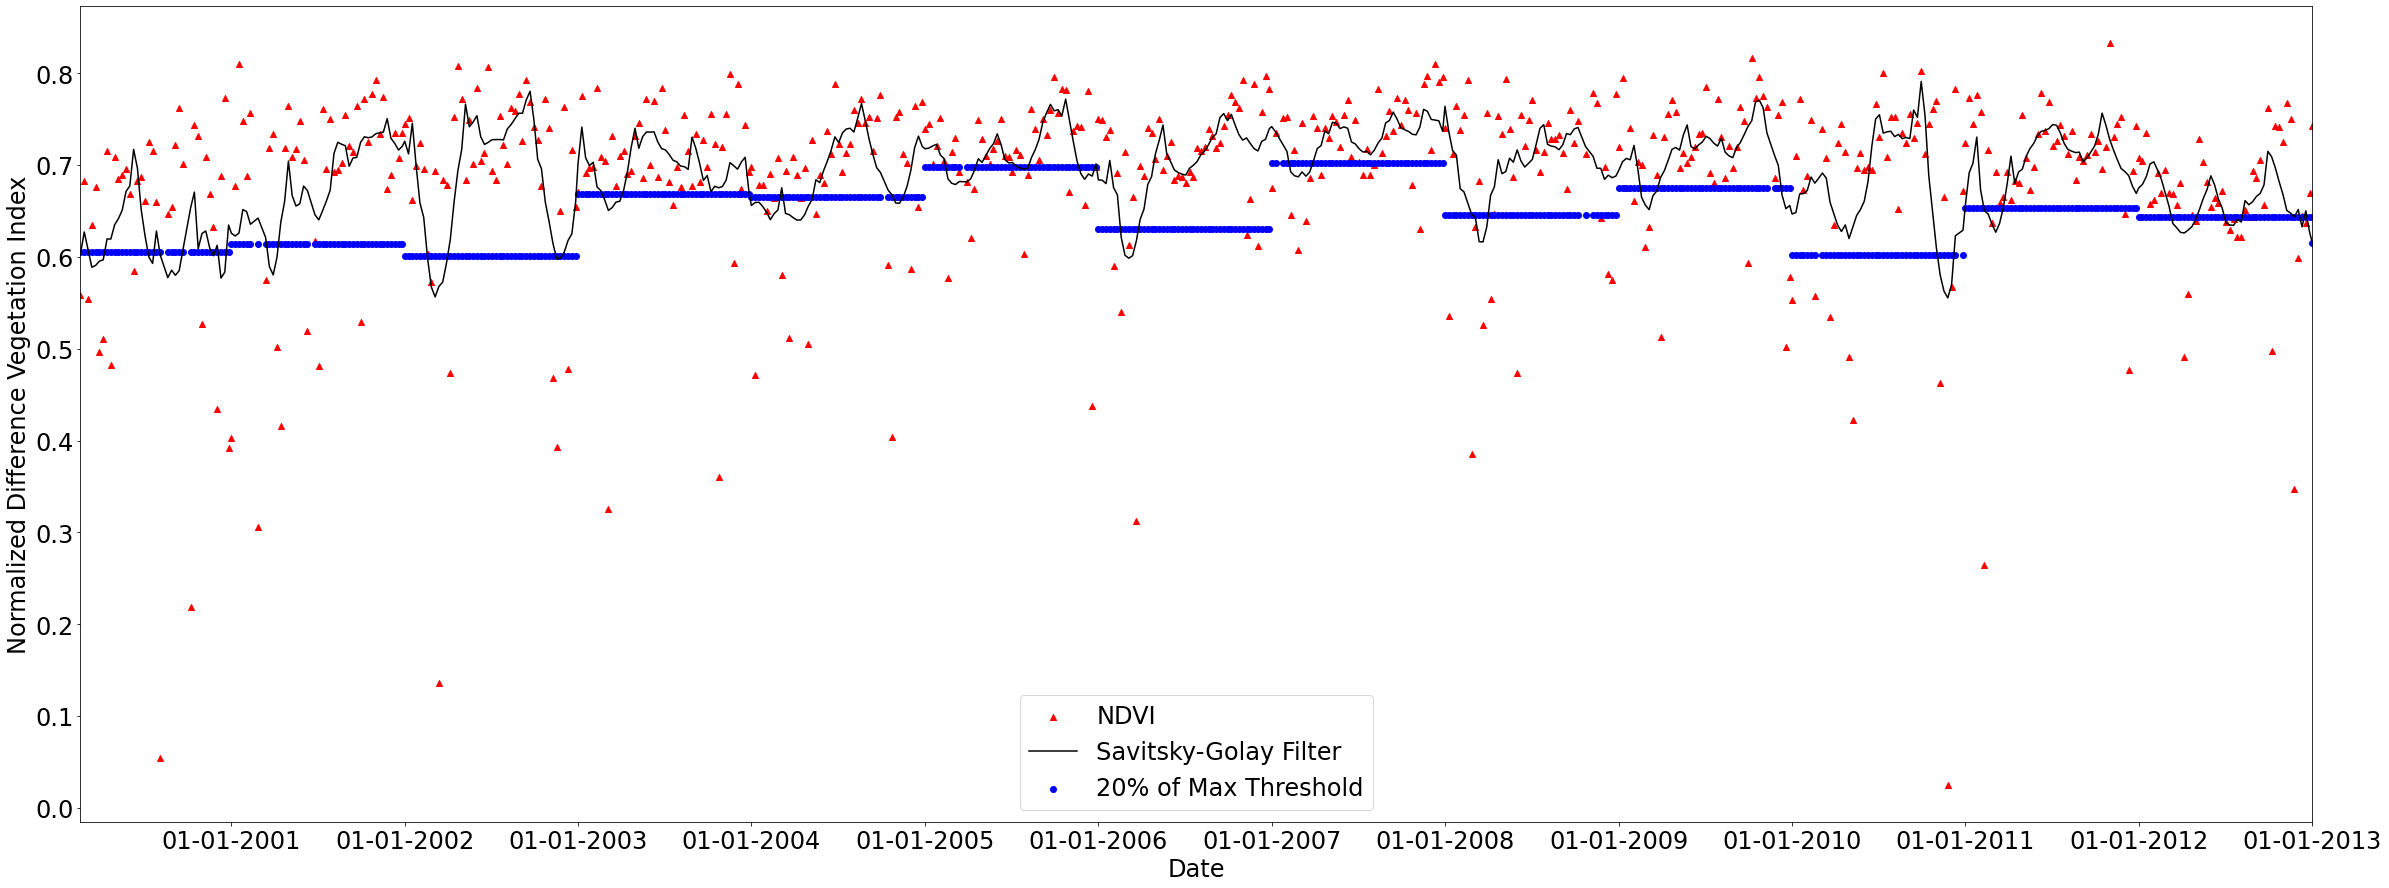

In [22]:
fig, ndvi = plt.subplots()
ndvi.scatter(df.index, df['NDVI'], color = 'red', label = 'NDVI', marker ='^')

# set x-label 
ndvi.set_xlabel('Date')
ndvi.tick_params('x', labelsize =24)

# set primary y label
ndvi.set_ylabel('Normalized Difference Vegetation Index')

# define the plot for the secondary y

# set x-axis limits as the min and max of the series
ndvi.set_xlim(date2num([df.index.min(), df.index.max()]))
ndvi.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ndvi.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

# plot the savitsky-golay filter
ndvi.plot(df.index, ndvisg, color = 'black', label = 'Savitsky-Golay Filter')
ndvi.scatter(df.index, df['NDVI_MINCORRECTED_20th'], color='blue', label = '20% of Max Threshold')
plt.legend()
plt.show()

In [24]:
# check if GPP_SG_FILT is less then Min_Corrected_Annual_20th%

# define a function which checks the value of the filtered SG value against the annual min corrected 20th percentile.
# if the value is less than the 20th% than FALSE, if greater it is TRUE
def check_df(df):
    if (df['NDVI_SG_FILT'] < (df['NDVI_MINCORRECTED_20th'])):
        return 0
    elif (df['NDVI_SG_FILT'] > (df['NDVI_MINCORRECTED_20th'])):
        return 1
    else:
        return np.nan


######
    
df['BoolCheck'] = df.apply(check_df, axis=1) # apply the function to the dataframe

######

# create another column which checks if the values in 'BoolCheck' change between rows.
# if they do than True, if they dont than false
df['changes'] = df["BoolCheck"].shift() != df["BoolCheck"] 

ndviSC = df.loc[df['changes'] == True] # create a new df that only has values of change 

#######

ndviSOS2 = ndviSC.loc[ndviSC['BoolCheck'] == 1] # filter for all the instances where the change goes from false to true, SOS

ndviEOS2 = ndviSC.loc[ndviSC['BoolCheck'] == 0] # Now filter for all the instances where the change is from true to false, EOS


ndviSOS1 = ndviSOS2[['NDVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns
ndviEOS1 = ndviEOS2[['NDVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns 

#ndSOS = ndviSOS1.drop(['2000-09-13','2000-11-08','2006-04-15','2010-01-01','2011-03-06'])
#ndEOS = ndviEOS1.drop(['2002-01-17','2000-02-18', '2001-01-01','2001-01-01','2003-01-17', '2003-02-18', '2006-01-17',
                      #'2006-03-30', '2007-01-01','2008-01-25','2009-02-26','2011-03-14'])

#print(ndviSOS1, ndviEOS1)

In [25]:
df_gs = df[['GRVI_SG_FILT','Year']] # select only EVI and Year for 20th percentile calc
df_g_max = df_gs.groupby('Year').max() # Determine the max value in each year
df_g_min = df_gs.groupby('Year').min() # Determine the min value in each year


df_amp_join = df_g_max.join(df_g_min, 'Year', lsuffix ='Year' ) #  join the max and min df 


df_amp_join.rename(columns = {'GRVI_SG_FILTYear':'GRVI_SG_FILT_MAX','GRVI_SG_FILT': 'GRVI_SG_FILT_MIN'}, inplace = True) # rename columns 

df_amp_join

df_amp = df_amp_join # rename df 

df_amp['GRVI_AMPLITUDE'] = df_amp['GRVI_SG_FILT_MAX'] - df_amp['GRVI_SG_FILT_MIN'] # calculate the amplitude of the yearly gpp change
df_amp['GRVI_20th'] = df_amp['GRVI_AMPLITUDE'].mul(.20) # determine the 20th percentile from the amplitude
df_amp['GRVI_MINCORRECTED_20th'] = df_amp['GRVI_SG_FILT_MIN'] + df_amp['GRVI_20th'] # correct the 20th percentile for the min

df_amp

,GRVI_SG_FILT_MAX,GRVI_SG_FILT_MIN,GRVI_AMPLITUDE,GRVI_20th,GRVI_MINCORRECTED_20th
Year,,,,,
2000,0.173692,0.115576,0.058116,0.011623,0.127199
2001,0.226452,0.132479,0.093973,0.018795,0.151274
2002,0.202485,0.122391,0.080094,0.016019,0.138409
2003,0.167390,0.121124,0.046266,0.009253,0.130377
2004,0.185886,0.107682,0.078204,0.015641,0.123323
2005,0.207962,0.135239,0.072723,0.014545,0.149784
2006,0.192615,0.118195,0.074420,0.014884,0.133079
2007,0.191840,0.121256,0.070584,0.014117,0.135373
2008,0.188420,0.130560,0.057859,0.011572,0.142132


In [26]:
df = df.join(df_amp, 'Year', how = 'left', lsuffix = 'Year') 

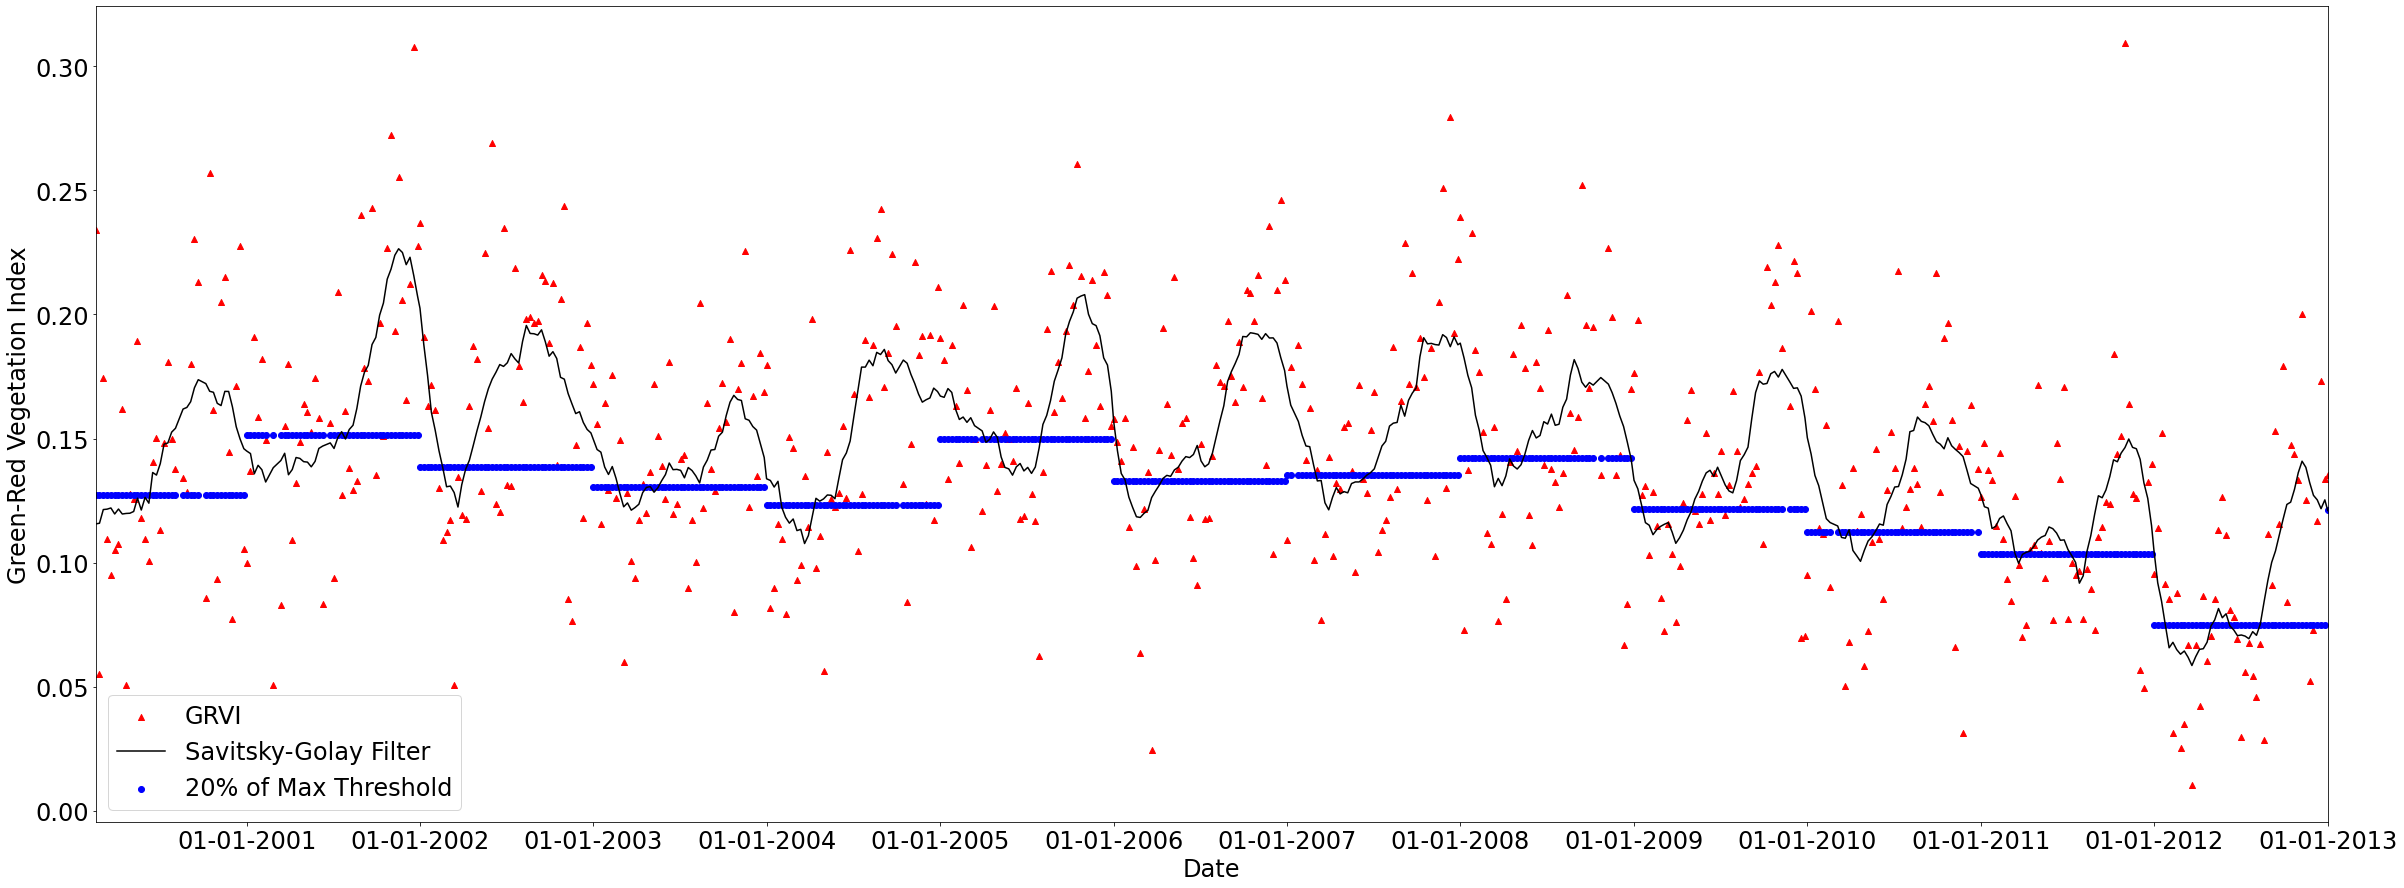

In [27]:
fig, grvi = plt.subplots()
grvi.scatter(df.index, df['GRVI'], color = 'red', label = 'GRVI', marker ='^')

# set x-label 
grvi.set_xlabel('Date')
grvi.tick_params('x', labelsize =24)

# set primary y label
grvi.set_ylabel('Green-Red Vegetation Index')

# define the plot for the secondary y

# set x-axis limits as the min and max of the series
grvi.set_xlim(date2num([df.index.min(), df.index.max()]))
grvi.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
grvi.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

# plot the savitsky-golay filter
grvi.plot(df.index, grvisg, color = 'black', label='Savitsky-Golay Filter')
grvi.scatter(df.index, df['GRVI_MINCORRECTED_20th'], color = 'blue', label = '20% of Max Threshold')
plt.legend()

plt.show()

In [29]:
# check if GPP_SG_FILT is less then Min_Corrected_Annual_20th%

# define a function which checks the value of the filtered SG value against the annual min corrected 20th percentile.
# if the value is less than the 20th% than FALSE, if greater it is TRUE
def check_df(df):
    if (df['GRVI_SG_FILT'] < (df['GRVI_MINCORRECTED_20th'])):
        return 0
    elif (df['GRVI_SG_FILT'] > (df['GRVI_MINCORRECTED_20th'])):
        return 1
    else:
        return np.nan


######
    
df['BoolCheck'] = df.apply(check_df, axis=1) # apply the function to the dataframe

######

# create another column which checks if the values in 'BoolCheck' change between rows.
# if they do than True, if they dont than false
df['changes'] = df["BoolCheck"].shift() != df["BoolCheck"] 

grviSC = df.loc[df['changes'] == True] # create a new df that only has values of change 

#######

grviSOS2 = grviSC.loc[grviSC['BoolCheck'] == 1] # filter for all the instances where the change goes from false to true, SOS

grviEOS2 = grviSC.loc[grviSC['BoolCheck'] == 0] # Now filter for all the instances where the change is from true to false, EOS


grviSOS1 = grviSOS2[['GRVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns
grviEOS1 = grviEOS2[['GRVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns 

grSOS = grviSOS1.drop(['2001-07-20','2001-08-05','2003-05-25','2005-08-05','2009-01-01','2010-05-25','2011-08-13','2012-08-12'])
grEOS = grviEOS1.iloc[12]

#print(grSOS)
#print(grviEOS1)

In [ ]:
#ndSOS.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD19A1_25pixel\MOD19_ND_SOS.csv')
#ndEOS.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD19A1_25pixel\MOD19_ND_EOS.csv')

eSOS.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD19A1_25pixel\MOD19_E_SOS.csv')
eEOS.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD19A1_25pixel\MOD19_E_EOS.csv')

grSOS.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD19A1_25pixel\MOD19_GR_SOS.csv')
grEOS.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD19A1_25pixel\MOD19_GR_EOS.csv')